In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# display all outputs in each cell, not just the last one

pd.set_option('display.max_columns', None)
# Show all columns
# To reset
# pd.reset_option('display.max_columns')


## Data Exploration and Cleaning

In [2]:
file_path = "./finance_economics_dataset.csv"

df = pd.read_csv(file_path)
col_description = {
    "Date": "The date of the financial data (YYYY-MM-DD)",
    "Stock Index": "The stock market index (S&P 500, NASDAQ, Dow Jones)",
    "Open Price": "Opening price of the stock market on the given day (USD)",
    "Close Price": "Closing price of the stock market on the given day (USD)",
    "Daily High": "Highest stock price reached during the day (USD)",
    "Daily Low": "Lowest stock price reached during the day (USD)",
    "Trading Volume": "Number of shares traded on that day",
    "GDP Growth": "Percentage change in Gross Domestic Product (GDP) (%)",
    "Inflation Rate": "Percentage change in the Consumer Price Index (CPI) (%)",
    "Unemployment Rate": "Percentage of unemployed individuals in the labor force (%)",
    "Interest Rate": "(%)",
    "Consumer Confidence Index": None,
    "Government Debt (Billion USD)": None,
    "Corporate Profits (Billion USD)": None,
    "Forex USD/EUR": None,
    "Forex USD/JPY": None,
    "Crude Oil Price": "(USD per Barrel)",
    "Gold Price": "(USD per Ounce)",
    "Real Estate Index": None,
    "Retail Sales": "(USD per Ounce)",
    "Bankruptcy Rate": "(%)",
    "Mergers & Acquisitions Deals": None,
    "Venture Capital Funding": "(Billion USD)",
    "Consumer Spending": None
}

df.head()
print(col_description["Date"])
print(col_description["Forex USD/EUR"])

Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0  2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
1  2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2  2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
3  2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
4  2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

   Trading Volume  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0         2670411           -0.37                6.06                   6.10   
1       690220415            3.19                4.95                   6.62   
2       315284661            5.54                9.13                   2.60   
3        13098297           10.00                3.77                   2.20   
4       385306746            1.53                2.20                   8.20   

   Interest Rate (%)  Consumer Confidence Index  \
0               6.06                        114   
1               2.19                        101   
2               0.82                         92   
3               3.71                        112   
4               4.56                         99   

   Government Debt (Billion USD)  Corporate Profits (Billion USD)  \
0                          27271                             1645   
1                          16160                             1008   
2                          29962                             4562   
3                          12745                             4183   
4                          22293                             3440   

   Forex USD/EUR  Forex USD/JPY  Crude Oil Price (USD per Barrel)  \
0           1.04         119.87                             47.20   
1           1.00          98.22                             52.84   
2           0.83          80.13                             78.80   
3           0.95         149.15                             28.18   
4           1.43         113.71                             92.20   

   Gold Price (USD per Ounce)  Real Estate Index  Retail Sales (Billion USD)  \
0                     1052.34             390.23                        2229   
1                     1957.73             346.23                        4156   
2                     2339.49             439.46                         340   
3                     1308.54             213.07                        8456   
4                     2210.08             405.49                        1596   

   Bankruptcy Rate (%)  Mergers & Acquisitions Deals  \
0                 2.12                             3   
1                 1.40                            21   
2                 0.79                            48   
3                 4.22                            16   
4                 2.21                            34   

   Venture Capital Funding (Billion USD)  Consumer Spending (Billion USD)  
0                                  76.64                             4589  
1                                   5.67                            10101  
2                                  39.43                            13665  
3                                  12.83                             5192  
4                                  86.37                            10688

The date of the financial data (YYYY-MM-DD)
None


In [3]:
df.info()
# If the data type of a column is not what you expect it to be, 
# this can often be a signal that the data needs cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [4]:
df.isnull().sum()
# seems no missing data (explicit NaN values)

# make a copy of current df
fe_df = df.copy()
fe_df.head()
fe_df.tail()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0  2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
1  2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2  2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
3  2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
4  2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

   Trading Volume  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0         2670411           -0.37                6.06                   6.10   
1       690220415            3.19                4.95                   6.62   
2       315284661            5.54                9.13                   2.60   
3        13098297           10.00                3.77                   2.20   
4       385306746            1.53                2.20                   8.20   

   Interest Rate (%)  Consumer Confidence Index  \
0               6.06                        114   
1               2.19                        101   
2               0.82                         92   
3               3.71                        112   
4               4.56                         99   

   Government Debt (Billion USD)  Corporate Profits (Billion USD)  \
0                          27271                             1645   
1                          16160                             1008   
2                          29962                             4562   
3                          12745                             4183   
4                          22293                             3440   

   Forex USD/EUR  Forex USD/JPY  Crude Oil Price (USD per Barrel)  \
0           1.04         119.87                             47.20   
1           1.00          98.22                             52.84   
2           0.83          80.13                             78.80   
3           0.95         149.15                             28.18   
4           1.43         113.71                             92.20   

   Gold Price (USD per Ounce)  Real Estate Index  Retail Sales (Billion USD)  \
0                     1052.34             390.23                        2229   
1                     1957.73             346.23                        4156   
2                     2339.49             439.46                         340   
3                     1308.54             213.07                        8456   
4                     2210.08             405.49                        1596   

   Bankruptcy Rate (%)  Mergers & Acquisitions Deals  \
0                 2.12                             3   
1                 1.40                            21   
2                 0.79                            48   
3                 4.22                            16   
4                 2.21                            34   

   Venture Capital Funding (Billion USD)  Consumer Spending (Billion USD)  
0                                  76.64                             4589  
1                                   5.67                            10101  
2                                  39.43                            13665  
3                                  12.83                             5192  
4                                  86.37                            10688

Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
2995  2008-03-14   Dow Jones     1273.76      1235.44     1317.28    1192.34   
2996  2008-03-15     S&P 500     4589.59      4566.91     4607.56    4545.69   
2997  2008-03-16     S&P 500     1477.52      1448.47     1523.86    1402.69   
2998  2008-03-17      NASDAQ     2311.37      2306.90     2346.30    2282.00   
2999  2008-03-18      NASDAQ     4262.98      4303.82     4316.68    4243.04   

      Trading Volume  GDP Growth (%)  Inflation Rate (%)  \
2995        86910001            8.84                7.00   
2996       303579301           -1.88                9.15   
2997       442387176            4.07                0.88   
2998       523425925            1.06                8.61   
2999       990814609            6.61                7.93   

      Unemployment Rate (%)  Interest Rate (%)  Consumer Confidence Index  \
2995                  10.44               7.29                        117   
2996                   5.61               8.46                         78   
2997                   8.91               4.80                         85   
2998                  10.15               7.60                        106   
2999                  10.32               3.37                         61   

      Government Debt (Billion USD)  Corporate Profits (Billion USD)  \
2995                          10296                             4236   
2996                          16160                             3079   
2997                          15186                             1290   
2998                           6495                             1344   
2999                           1069                             4508   

      Forex USD/EUR  Forex USD/JPY  Crude Oil Price (USD per Barrel)  \
2995           1.18         113.52                             61.98   
2996           1.17         147.10                             31.61   
2997           1.02          81.99                             45.64   
2998           1.49          86.42                            123.25   
2999           0.85          97.03                            144.06   

      Gold Price (USD per Ounce)  Real Estate Index  \
2995                     2385.41             298.72   
2996                     2147.13             143.43   
2997                     1943.61             105.81   
2998                     2211.40             236.07   
2999                     1225.09             201.82   

      Retail Sales (Billion USD)  Bankruptcy Rate (%)  \
2995                        3033                 8.75   
2996                        7950                 5.07   
2997                        3894                 5.78   
2998                        2543                 2.35   
2999                        4354                 7.99   

      Mergers & Acquisitions Deals  Venture Capital Funding (Billion USD)  \
2995                            35                                  66.01   
2996                            18                                  25.49   
2997                             4                                  14.29   
2998                            22                                  94.34   
2999                            43                                  63.36   

      Consumer Spending (Billion USD)  
2995                             2200  
2996                             5261  
2997                            12039  
2998                            11979  
2999                            11220

In [5]:
# convert the object type of date to datetime
fe_df["Date"] = pd.to_datetime(fe_df["Date"])

# To check if this dataset includes all the entries between the starting date and the end
# get beginning and end of date range
min_dt = df.Date.min()
max_dt = df.Date.max()
print(min_dt)
print(max_dt)

expected_range = pd.date_range(start = min_dt, end = max_dt, freq='d' )
expected_range
# So there should be 3000 entries in this dataset

fe_df.shape
# which matches with the dataset shape

# Double check with difference method
missing_days = expected_range.difference(fe_df['Date'])
print(missing_days)

2000-01-01
2008-03-18


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2008-03-09', '2008-03-10', '2008-03-11', '2008-03-12',
               '2008-03-13', '2008-03-14', '2008-03-15', '2008-03-16',
               '2008-03-17', '2008-03-18'],
              dtype='datetime64[ns]', length=3000, freq='D')

(3000, 24)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [6]:
# To make sure dataset is sorted by date in ascending order
fe_df = fe_df.sort_values(by="Date")
fe_df.reset_index(drop=True, inplace=True)  
#drop=True discards the current index, inplace=True applies changes to the fe_df
df.head(20)
df.columns

Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0   2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
1   2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2   2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
3   2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
4   2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   
5   2000-01-06     S&P 500     2087.80      2124.76     2153.18    2085.18   
6   2000-01-07   Dow Jones     4037.59      3996.40     4055.78    3948.97   
7   2000-01-08      NASDAQ     2798.96      2826.64     2864.47    2766.89   
8   2000-01-09   Dow Jones     4106.84      4141.59     4154.46    4062.99   
9   2000-01-10   Dow Jones     1261.46      1229.64     1296.14    1195.84   
10  2000-01-11   Dow Jones     2950.28      2943.31     2952.27    2925.46   
11  2000-01-12   Dow Jones     1134.45      1101.00     1176.42    1075.37   
12  2000-01-13     S&P 500     1250.61      1271.27     1293.68    1216.82   
13  2000-01-14   Dow Jones     4625.75      4629.28     4661.11    4577.74   
14  2000-01-15      NASDAQ     1556.98      1570.51     1581.57    1544.30   
15  2000-01-16     S&P 500     3129.68      3099.33     3163.53    3055.58   
16  2000-01-17      NASDAQ     2644.38      2615.55     2682.99    2569.35   
17  2000-01-18      NASDAQ     2389.37      2343.52     2413.03    2310.00   
18  2000-01-19      NASDAQ     4599.33      4581.54     4630.22    4534.98   
19  2000-01-20      NASDAQ     1087.29      1093.26     1116.08    1067.40   

    Trading Volume  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0          2670411           -0.37                6.06                   6.10   
1        690220415            3.19                4.95                   6.62   
2        315284661            5.54                9.13                   2.60   
3         13098297           10.00                3.77                   2.20   
4        385306746            1.53                2.20                   8.20   
5         82664194            1.42                6.08                   3.24   
6        653722138            7.64                6.24                   4.52   
7        423890033            7.08                4.39                  13.01   
8        867172199            5.97                4.87                   9.42   
9        174582201            1.95                9.60                  10.24   
10       320527008           -0.14                7.33                   4.44   
11       715127821            4.13                1.11                  12.77   
12        90792126            8.14                2.12                  13.28   
13       595281205            8.26                9.76                   8.80   
14       866560662           -3.37                7.26                  13.86   
15       415077918            1.43                9.15                  12.98   
16       965696140            1.97                3.04                  11.51   
17         3991992            9.66                7.42                  11.54   
18       215525643            5.17                7.14                   3.37   
19       995760162            1.11                2.95                   5.52   

    Interest Rate (%)  Consumer Confidence Index  \
0                6.06                        114   
1                2.19                        101   
2                0.82                         92   
3                3.71                        112   
4                4.56                         99   
5                1.09                         88   
6                8.24                         91   
7                3.77                         66   
8                9.18                         92   
9                1.97                         98   
10               1.04                         54   
11               5.08                        

Index(['Date', 'Stock Index', 'Open Price', 'Close Price', 'Daily High',
       'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)',
       'Consumer Confidence Index', 'Government Debt (Billion USD)',
       'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY',
       'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)',
       'Real Estate Index', 'Retail Sales (Billion USD)',
       'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals',
       'Venture Capital Funding (Billion USD)',
       'Consumer Spending (Billion USD)'],
      dtype='object')

## Exploratory Data Analysis

In [7]:
sns.set_theme(style="white", palette="muted", context="talk")

# to make this dataframe a time-indexed dataframe
fe_df = fe_df.set_index("Date")

### Economics Indicator

##### GDP

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='Date', ylabel='GDP Growth (%)'>

Text(0.5, 1.0, 'Biweekly Average GDP Growth (%)')

Text(0, 0.5, 'GDP Growth (%)')

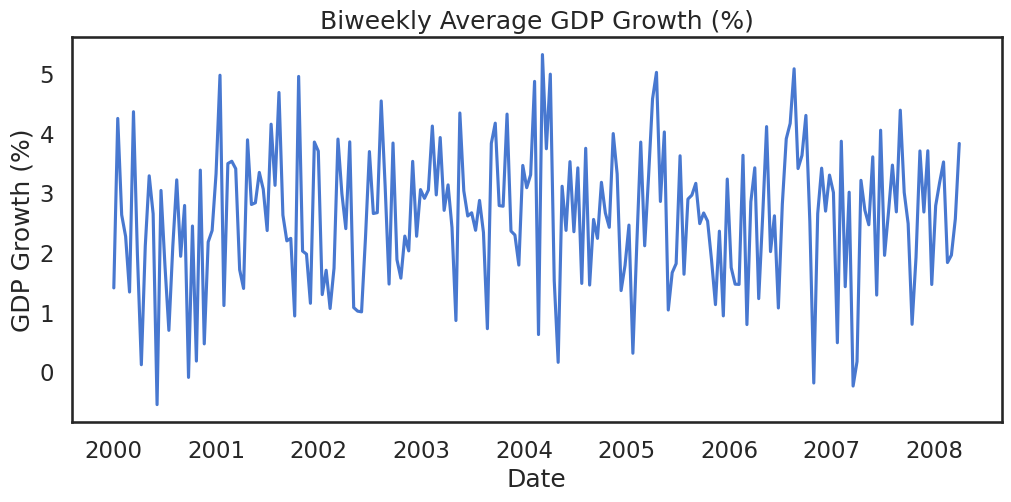

In [8]:
biweekly_gdp_avg = fe_df.resample('2W')["GDP Growth (%)"].mean().reset_index()

# can easily change the frequency to 2-month, 3-month, or 10-day intervals using offset aliases.
# fe_df.resample('<offset>').mean()
# | Alias  | Meaning                   | Example                                           |
# | ------ | ------------------------- | ------------------------------------------------- |
# | `'D'`  | 1 day                     | `'10D'` → every 10 days                           |
# | `'W'`  | 1 week                    | `'2W'` → every 2 weeks                            |
# | `'ME'`  | month end                 | `'2ME'` → every 2 months (end of every 2nd month)  |
# | `'MS'` | month start               | `'3MS'` → every 3 months, starting at month start |
# | `'QE'`  | quarter end               | `'QE'` or `'2QE'`                                   |
# | `'YE'`  | year end                  | `'YE'` = yearly                                    |


plt.figure(figsize=(12,5))
sns.lineplot(x="Date", y='GDP Growth (%)', data=biweekly_gdp_avg)
plt.title("Biweekly Average GDP Growth (%)")
plt.ylabel("GDP Growth (%)")
plt.show()

### Correlation Heatmap Between Indicators
Including correlation analysis of the data on a daily, monthly, and quarterly basis.

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Daily Basis')

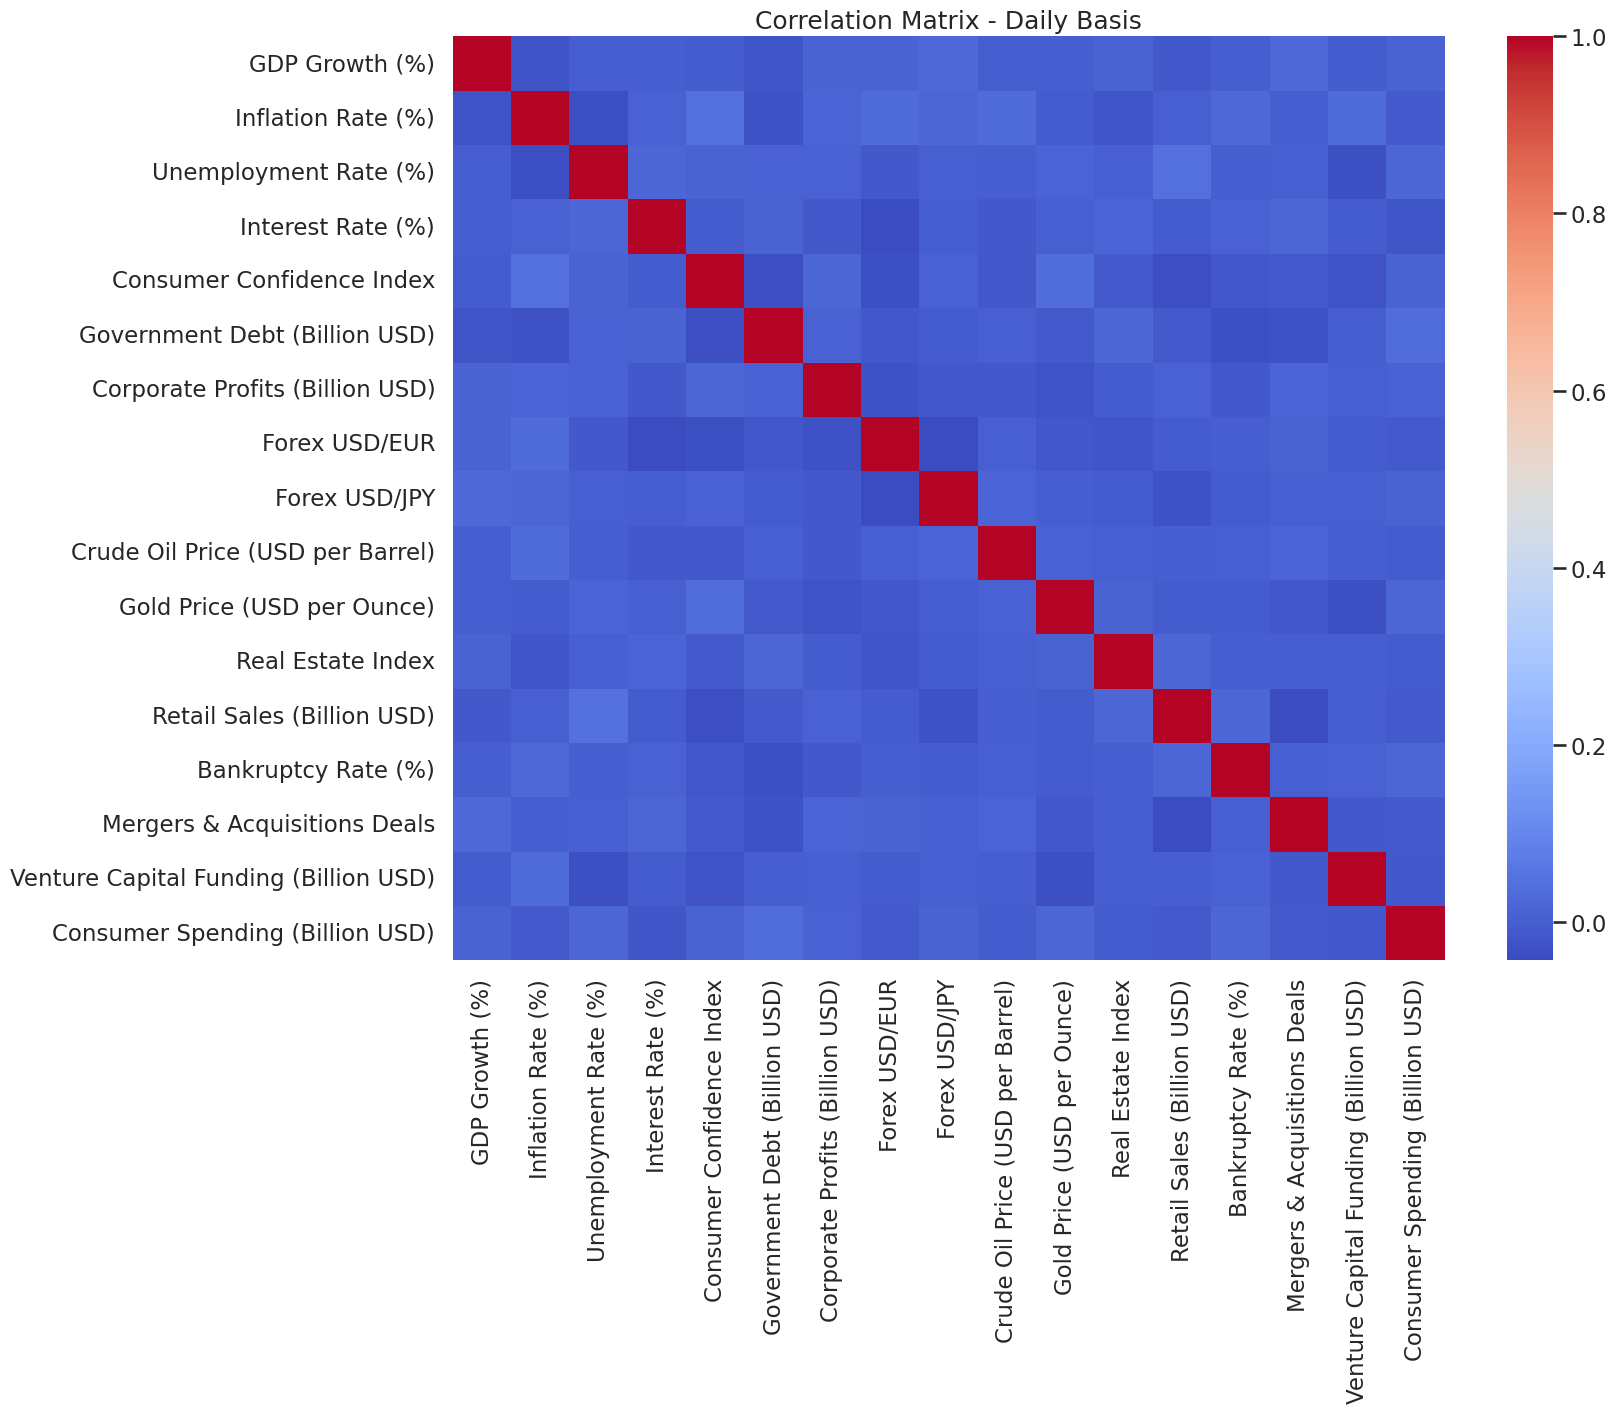

In [22]:
# Creating a correlation matrix Daily basis
correlation_matrix = fe_df[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Daily Basis')
plt.show()

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Biweekly Basis')

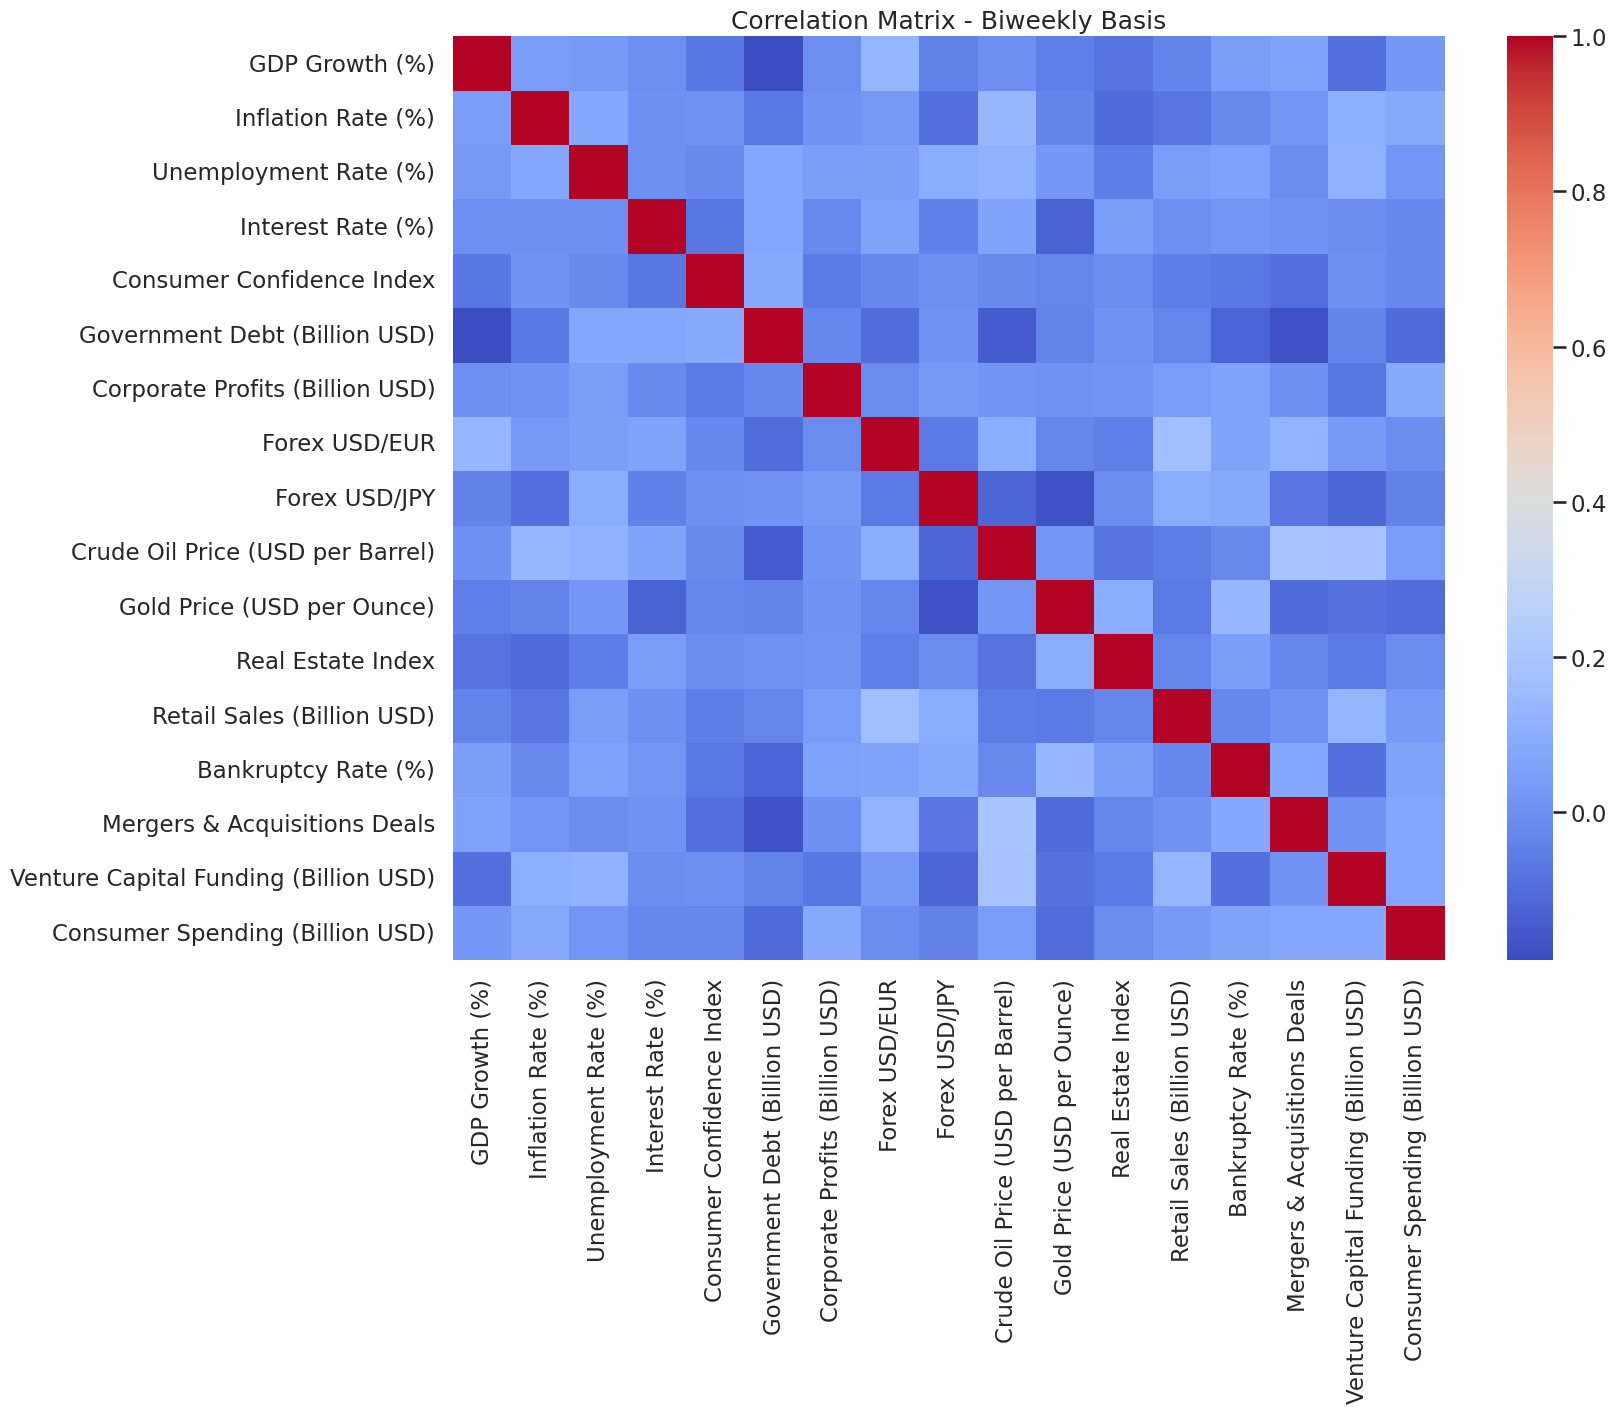

In [19]:
# Creating a correlation matrix Biweekly basis
biweekly_avg = fe_df.resample('2W')[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].mean().reset_index()

correlation_matrix = biweekly_avg[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Biweekly Basis')
plt.show()

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Monthly Basis')

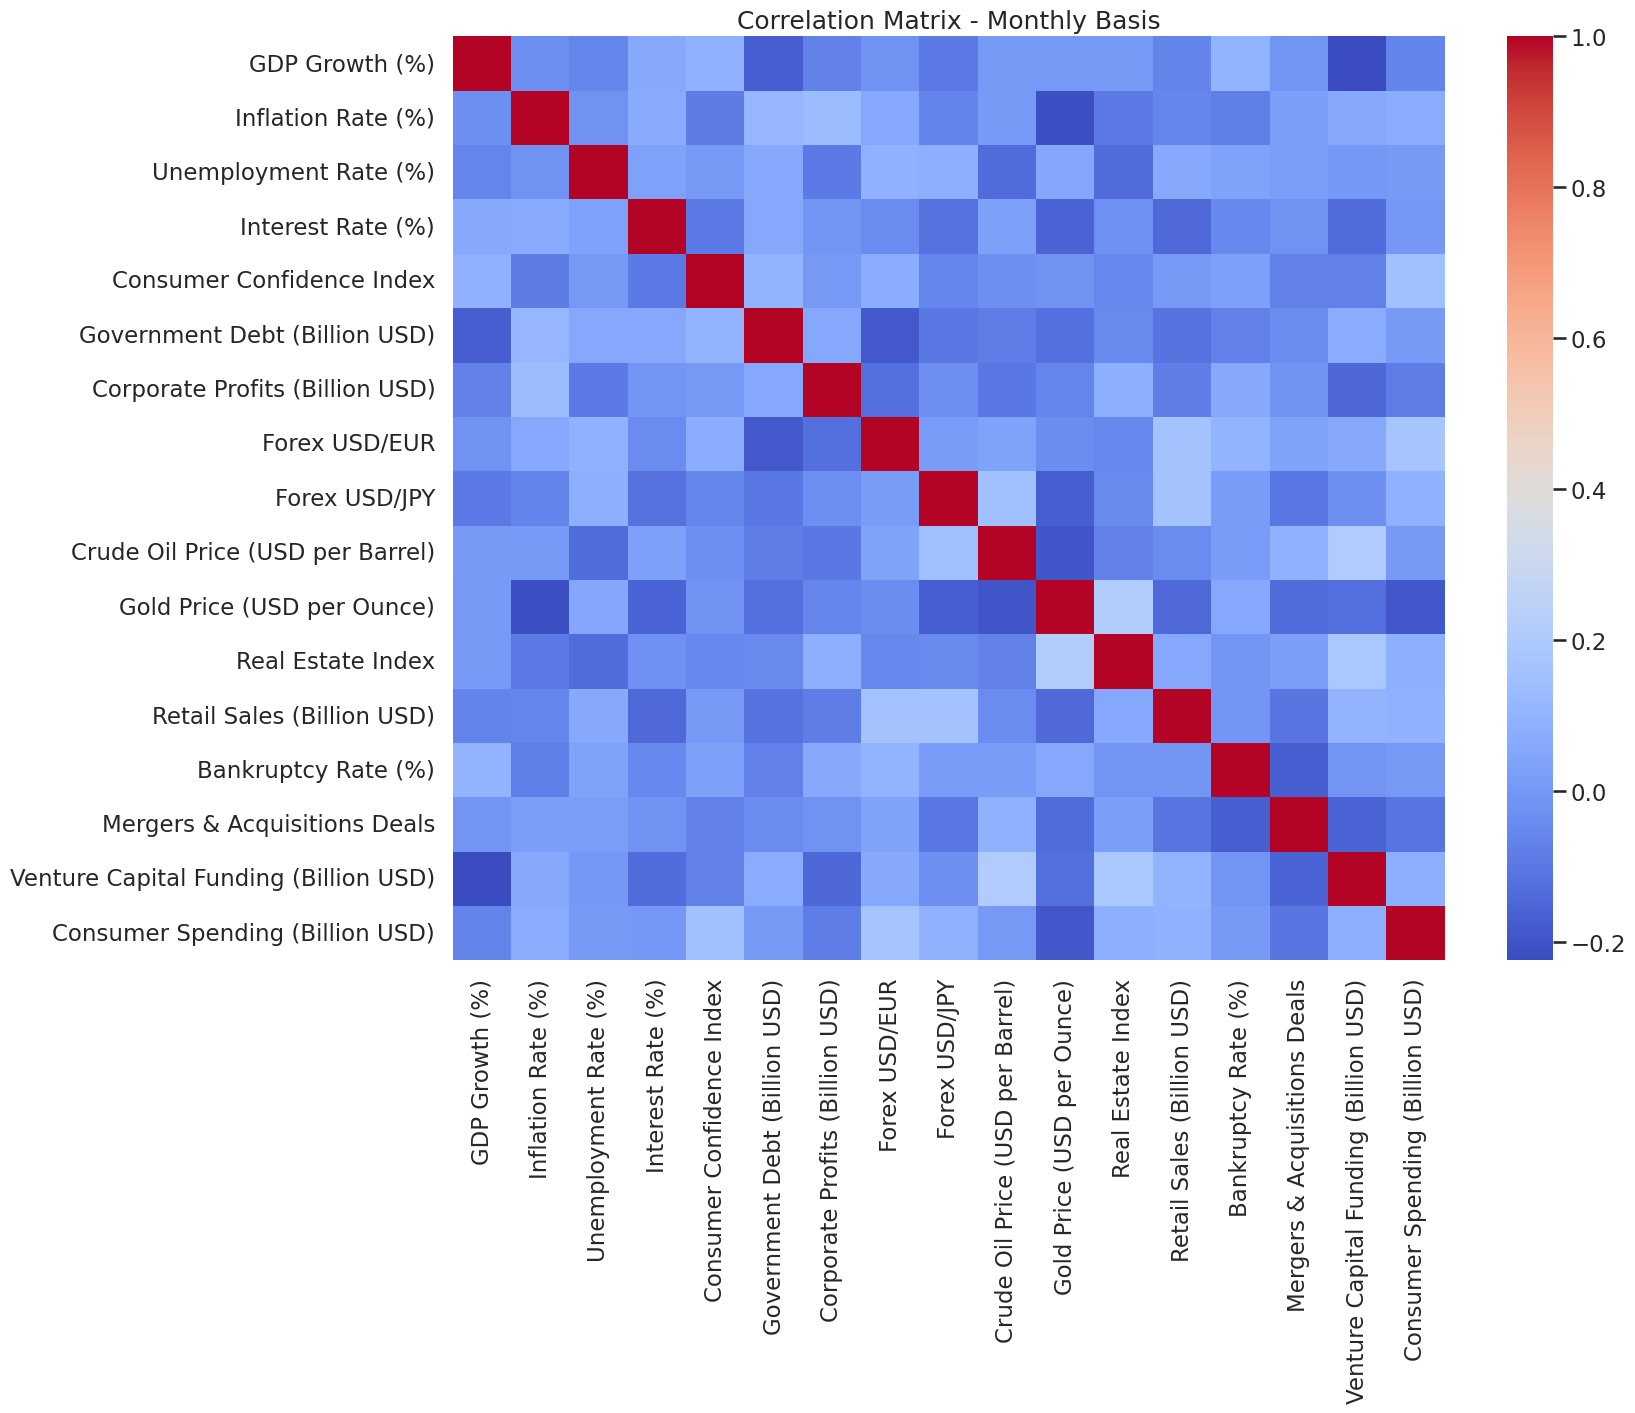

In [20]:
# Creating a correlation matrix Monthly basis
monthly_avg = fe_df.resample('ME')[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].mean().reset_index()

correlation_matrix = monthly_avg[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Monthly Basis')
plt.show()

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Quarterly Basis')

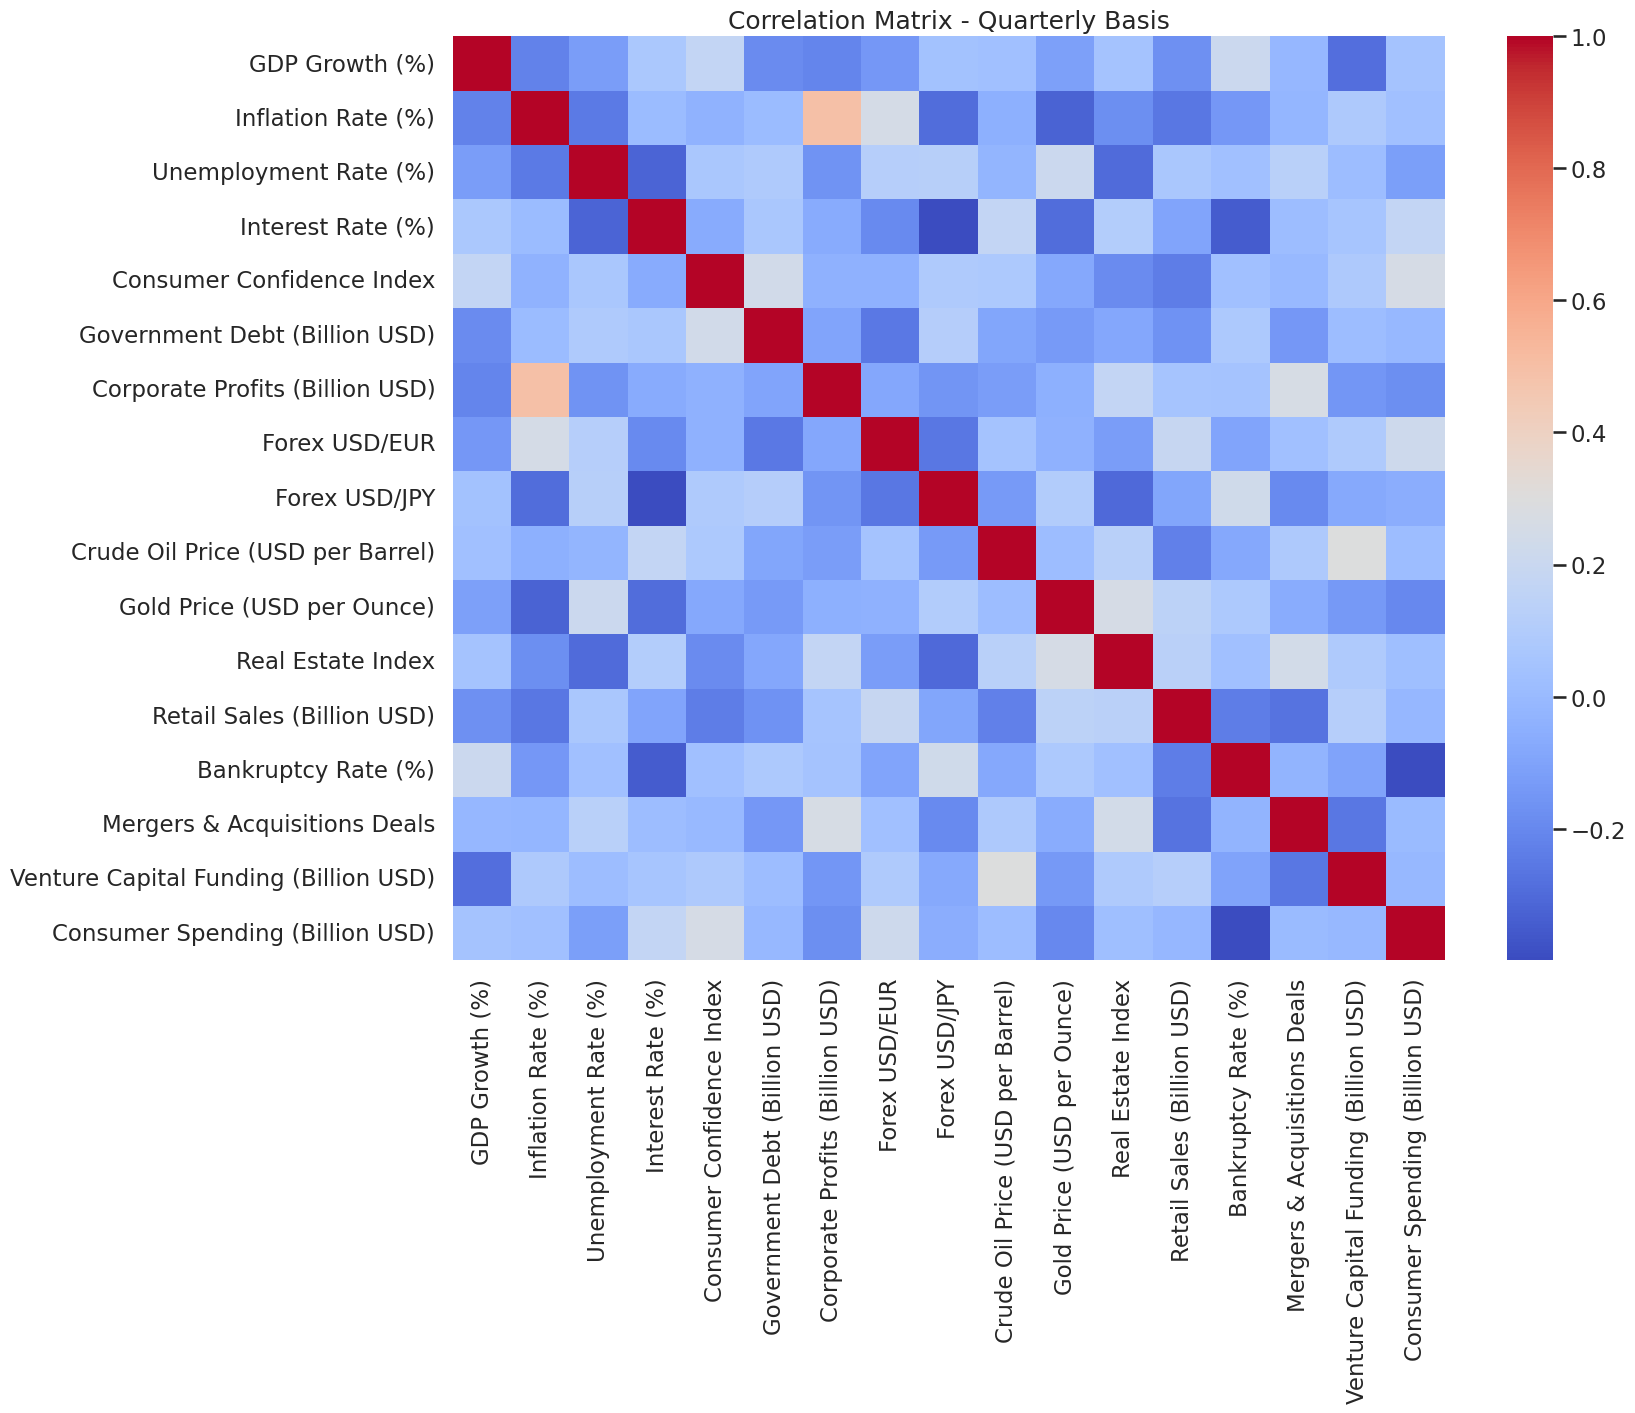

In [21]:
# Creating a correlation matrix Quarterly basis
quarterly_avg = fe_df.resample('QE')[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].mean().reset_index()

correlation_matrix = quarterly_avg[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Quarterly Basis')
plt.show()

In [11]:
fe_df.head()

Stock Index  Open Price  Close Price  Daily High  Daily Low  \
Date                                                                     
2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

            Trading Volume  GDP Growth (%)  Inflation Rate (%)  \
Date                                                             
2000-01-01         2670411           -0.37                6.06   
2000-01-02       690220415            3.19                4.95   
2000-01-03       315284661            5.54                9.13   
2000-01-04        13098297           10.00                3.77   
2000-01-05       385306746            1.53                2.20   

            Unemployment Rate (%)  Interest Rate (%)  \
Date                                                   
2000-01-01                   6.10               6.06   
2000-01-02                   6.62               2.19   
2000-01-03                   2.60               0.82   
2000-01-04                   2.20               3.71   
2000-01-05                   8.20               4.56   

            Consumer Confidence Index  Government Debt (Billion USD)  \
Date                                                                   
2000-01-01                        114                          27271   
2000-01-02                        101                          16160   
2000-01-03                         92                          29962   
2000-01-04                        112                          12745   
2000-01-05                         99                          22293   

            Corporate Profits (Billion USD)  Forex USD/EUR  Forex USD/JPY  \
Date                                                                        
2000-01-01                             1645           1.04         119.87   
2000-01-02                             1008           1.00          98.22   
2000-01-03                             4562           0.83          80.13   
2000-01-04                             4183           0.95         149.15   
2000-01-05                             3440           1.43         113.71   

            Crude Oil Price (USD per Barrel)  Gold Price (USD per Ounce)  \
Date                                                                       
2000-01-01                             47.20                     1052.34   
2000-01-02                             52.84                     1957.73   
2000-01-03                             78.80                     2339.49   
2000-01-04                             28.18                     1308.54   
2000-01-05                             92.20                     2210.08   

            Real Estate Index  Retail Sales (Billion USD)  \
Date                                                        
2000-01-01             390.23                        2229   
2000-01-02             346.23                        4156   
2000-01-03             439.46                         340   
2000-01-04             213.07                        8456   
2000-01-05             405.49                        1596   

            Bankruptcy Rate (%)  Mergers & Acquisitions Deals  \
Date                                                            
2000-01-01                 2.12                             3   
2000-01-02                 1.40                            21   
2000-01-03                 0.79                            48   
2000-01-04                 4.22                            16   
2000-01-05                 2.21                            34   

            Venture Capital Funding (Billion USD)  \
Date                                                
2000-01-01                                  76.64   
2000-01-02     